# Авиарейсы без потерь

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('anapa_airlines.csv')

In [3]:
data.columns

Index(['flight_id', 'aircraft_model', 'departure_date', 'actual_duration_mins',
       'departure_city', 'departure_latitude', 'departure_longitude',
       'arrival_city', 'arrival_latitude', 'arrival_longitude', 'tickets_sold',
       'tickets_economy', 'tickets_business', 'tickets_revenue',
       'economy_revenue', 'business_revenue', 'occupancy_ratio'],
      dtype='object')

- flight_id - id рейса
- aircraft_model - модель самолета
- departure_date - дата вылета самолета
- actual_duration_mins - длительность полета в минутах
- departure_city - город отправки (Анапа) 
- departure_latitude - широта города отправки
- departure_longitude - долгота города отправки   
- arrival_city - город прилета
- arrival_latitude - широта города прилета
- arrival_longitude - долгота города прилета
- tickets_sold - количество проданных билетов
- tickets_economy - количество проданных билетов в эконом классе
- tickets_business - количество проданных билетов в бизнес классе   
- tickets_revenue - доход от всех билетов
- economy_revenue - доход от билетов из эконом класса
- business_revenue - доход от билетов из бизнес класса   
- occupancy_ratio - процент заполненности салона самолета

Нам предстоит выяснить, от каких самых малоприбыльных рейсов мы можем отказаться, исползуя эти данные.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             193 non-null    int64  
 1   aircraft_model        180 non-null    object 
 2   departure_date        193 non-null    object 
 3   actual_duration_mins  193 non-null    float64
 4   departure_city        193 non-null    object 
 5   departure_latitude    193 non-null    float64
 6   departure_longitude   193 non-null    float64
 7   arrival_city          193 non-null    object 
 8   arrival_latitude      193 non-null    float64
 9   arrival_longitude     193 non-null    float64
 10  tickets_sold          180 non-null    float64
 11  tickets_economy       180 non-null    float64
 12  tickets_business      180 non-null    float64
 13  tickets_revenue       180 non-null    float64
 14  economy_revenue       180 non-null    float64
 15  business_revenue      1

Как мы видим в датасете есть пустые значения в определенных колонках и их одинаковое количество. Давайте взглянем на эти данные.

In [5]:
data[data.tickets_sold.isna()==True]

,flight_id,aircraft_model,departure_date,actual_duration_mins,departure_city,departure_latitude,departure_longitude,arrival_city,arrival_latitude,arrival_longitude,tickets_sold,tickets_economy,tickets_business,tickets_revenue,economy_revenue,business_revenue,occupancy_ratio
90,136511,NaN,2017-02-21,310.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,136513,NaN,2017-02-28,310.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,136514,NaN,2017-02-07,299.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,136518,NaN,2016-12-20,304.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,136523,NaN,2017-01-10,312.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,136533,NaN,2016-12-13,303.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,136534,NaN,2016-12-06,304.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,136540,NaN,2017-01-17,307.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,136544,NaN,2017-01-31,304.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,136546,NaN,2017-01-03,302.0,Anapa,45.002102,37.347301,Novokuznetsk,53.811401,86.877197,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все эти рейсы направлены в Новокузнецк и информация об этих рейсах отсутствует. Можно предположить, что это какие-либо технические рейсы. Эти данные не несут в себе никакой информации для нашего анализа, поэтому их можно убрать.

In [6]:
data.dropna(inplace=True)

In [7]:
data

,flight_id,aircraft_model,departure_date,actual_duration_mins,departure_city,departure_latitude,departure_longitude,arrival_city,arrival_latitude,arrival_longitude,tickets_sold,tickets_economy,tickets_business,tickets_revenue,economy_revenue,business_revenue,occupancy_ratio
0,136119,Boeing 737-300,2017-01-03,101.0,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,113.0,102.0,11.0,1653000.0,1250400.0,402600.0,0.869231
1,136120,Boeing 737-300,2017-02-24,99.0,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,109.0,98.0,11.0,1605400.0,1202800.0,402600.0,0.838462
2,136122,Boeing 737-300,2017-01-08,100.0,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,97.0,87.0,10.0,1431000.0,1065000.0,366000.0,0.746154
3,136130,Boeing 737-300,2017-02-13,99.0,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,107.0,97.0,10.0,1556600.0,1190600.0,366000.0,0.823077
4,136131,Boeing 737-300,2017-01-28,99.0,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,124.0,112.0,12.0,1812800.0,1373600.0,439200.0,0.953846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,136943,Sukhoi Superjet-100,2016-12-05,50.0,Anapa,45.002102,37.347301,Belgorod,50.643799,36.590099,94.0,83.0,11.0,733800.0,525900.0,207900.0,0.969072
189,136951,Sukhoi Superjet-100,2017-02-02,49.0,Anapa,45.002102,37.347301,Belgorod,50.643799,36.590099,90.0,78.0,12.0,720600.0,493800.0,226800.0,0.927835
190,136953,Sukhoi Superjet-100,2017-02-27,50.0,Anapa,45.002102,37.347301,Belgorod,50.643799,36.590099,97.0,85.0,12.0,765300.0,538500.0,226800.0,1.000000
191,136956,Sukhoi Superjet-100,2017-02-04,50.0,Anapa,45.002102,37.347301,Belgorod,50.643799,36.590099,96.0,85.0,11.0,746400.0,538500.0,207900.0,0.989691


Давайте сначала взглянем на номинальные признаки - модель самолета, город прибытия(плюс широта и долгота прибытия, длительность полета). Проверим соответствуют ли города прибытия и их координаты(нет ли в данных ошибок). Также провверим и саму Анапу.

In [8]:
data[['arrival_city','arrival_longitude','arrival_latitude','actual_duration_mins']].apply(lambda x: x.factorize()[0]).corr()

,arrival_city,arrival_longitude,arrival_latitude,actual_duration_mins
arrival_city,1.00000,1.00000,1.00000,0.93133
arrival_longitude,1.00000,1.00000,1.00000,0.93133
arrival_latitude,1.00000,1.00000,1.00000,0.93133
actual_duration_mins,0.93133,0.93133,0.93133,1.00000


In [9]:
display(data.departure_city.value_counts())
display(data.departure_longitude.value_counts())
display(data.departure_latitude.value_counts())

Anapa    180
Name: departure_city, dtype: int64

37.347301    180
Name: departure_longitude, dtype: int64

45.002102    180
Name: departure_latitude, dtype: int64

Все впорядке они полностью коррелируют. Теперь посмотрим сколько моделей самолетов и количество городов прибытия и их распределение.

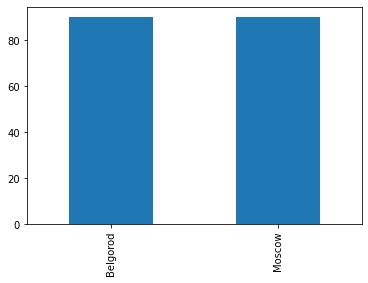

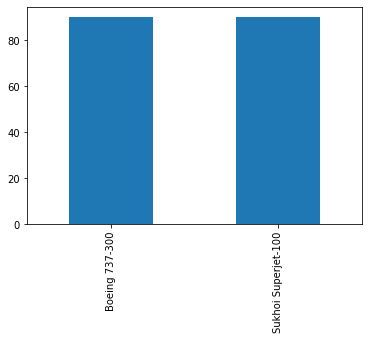

In [10]:
plt.figure(1)
data.arrival_city.value_counts().plot(kind='bar')
plt.figure(2)
data.aircraft_model.value_counts().plot(kind='bar')

В зимнее время из Анапы вылетают рейсы только по двум направлениям. Это Москва и Белгород. Также летают только две модели самолетов.

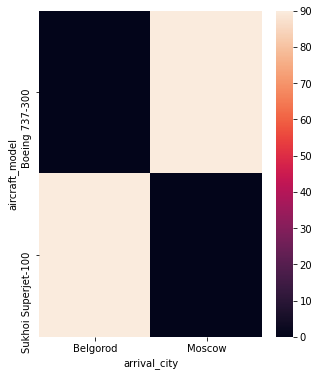

In [11]:
plt.figure(figsize=(5,6))
sns.set_color_codes('pastel')
sns.heatmap(pd.crosstab(data.aircraft_model, data.arrival_city))

В Москву летает Boeing 737-300, а в Белгород Sukhoi Superjet-100

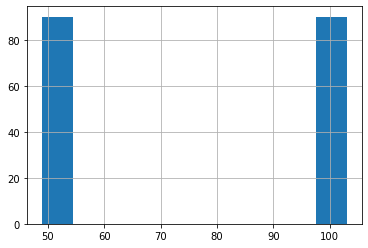

In [12]:
data.actual_duration_mins.hist()

В данных про длительность полета нету никаких выбросов и аномалии.

Теперь рассмотрим количественные признаки, то есть все данные по билетам и еще заполненность салона. Построим Boxplots для каждого такого столбца.

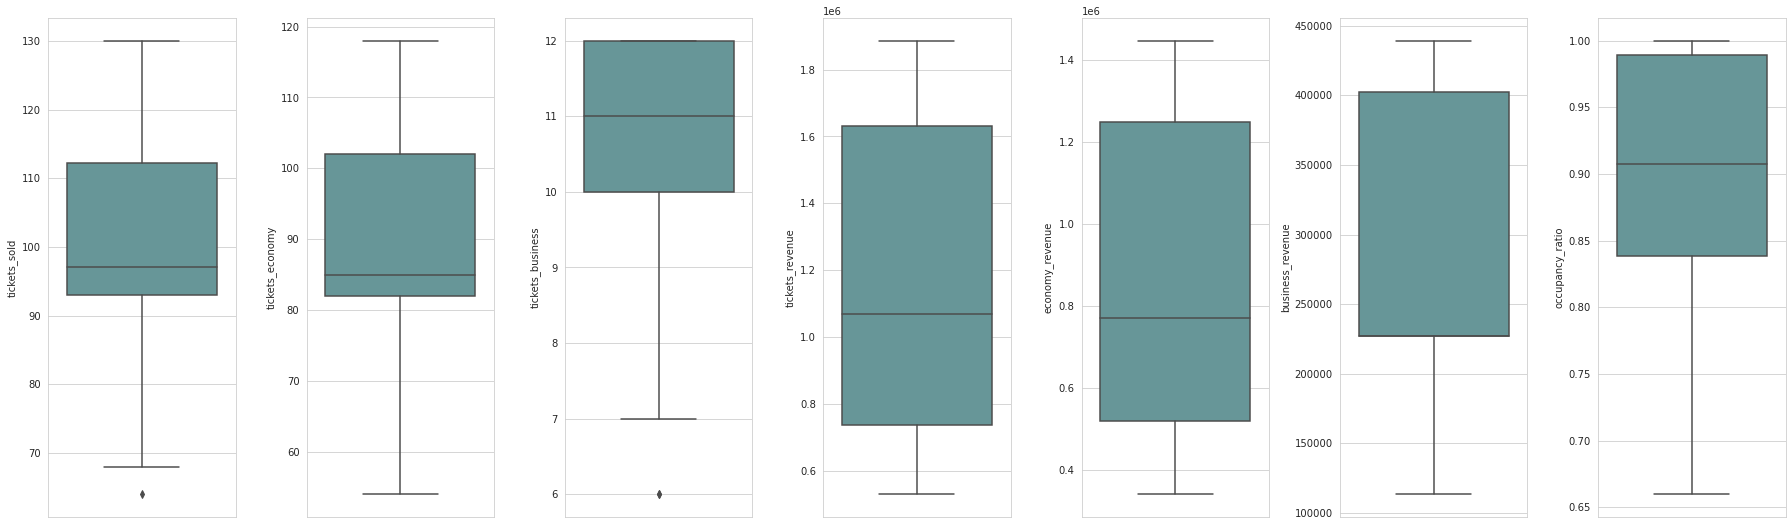

In [13]:
l = ['tickets_sold',
     'tickets_economy', 'tickets_business', 'tickets_revenue',
     'economy_revenue', 'business_revenue', 'occupancy_ratio']
number_of_columns = 7
number_of_rows = len(l)-1/number_of_columns
fig0 = plt.figure(figsize=(25,50))
for i in range(0, len(l)):
    sns.set_style('whitegrid')
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.set_color_codes('pastel')
    sns.boxplot(data[l[i]], color='cadetblue', orient='v')
    plt.tight_layout()


In [14]:
fig0.savefig('0.png',bbox_inches='tight',dpi=200, transparent=True)

Видно, что в количестве проданных билетов в общем и количестве проданных билетов бизнес класса есть выбросы. 

Теперь взглянем на каждое направление по одтельности

In [15]:
datam = data[data.arrival_city == 'Moscow']

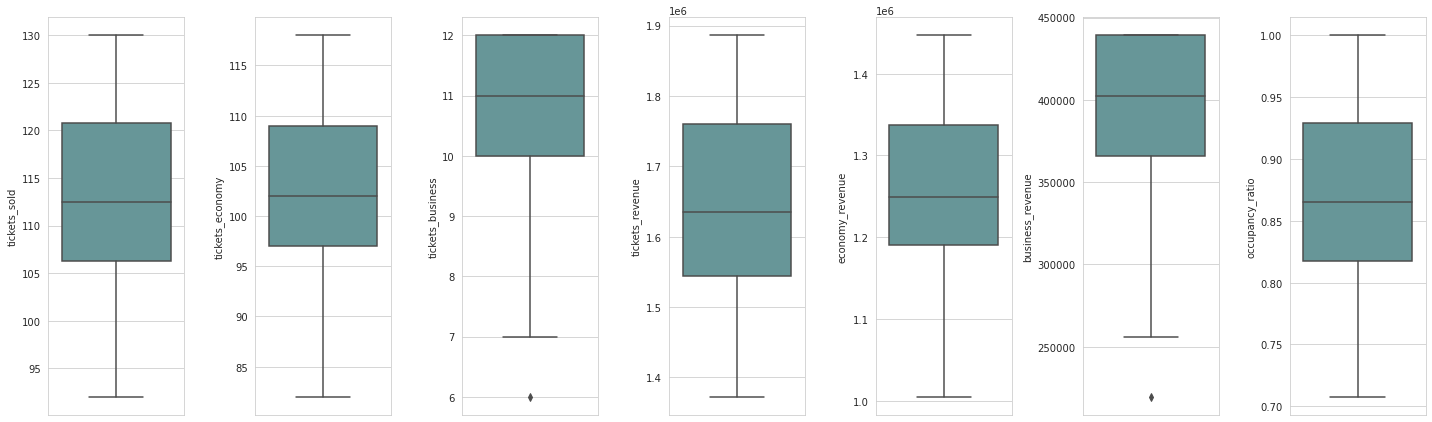

In [16]:
fig1 = plt.figure(figsize=(20,40))
for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(datam[l[i]],color='cadetblue',orient='v')
    plt.tight_layout()

In [17]:
fig1.savefig('me.png',bbox_inches='tight',dpi=200, transparent=True)

Здесь выбросы только в билетах бизнес класса.

In [18]:
datab = data[data.arrival_city == 'Belgorod']

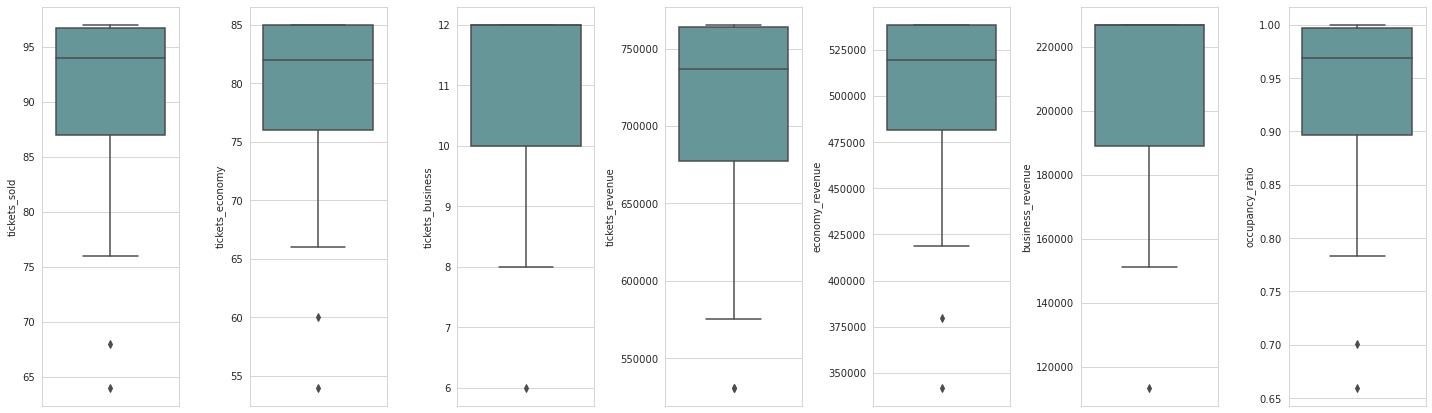

In [19]:
fig2 = plt.figure(figsize=(20,40))
for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.set_color_codes('pastel')
    sns.boxplot(datab[l[i]],color='cadetblue',orient='v')
    plt.tight_layout()

In [20]:
fig2.savefig('2.png',bbox_inches='tight',dpi=200, transparent=True)

Что же касается направления Белгород, тут наблюдаются выбросы в билетах каждого класса и также в заполненности салона.

Как мы можем заметить, прибыль за продажу билетов в Белгород вдвое меньше чем в Москву, но все же количество рейсов с большой прибылью по направлению Белгород значительно больше. Также тут видно, что общая заполненность в Белгород намного выше, чем в Москву, хотя по направлению Белгород наблюдаются два выброса.

Теперь добавим информацию о стоимости топлива, а также о расходах топлива для каждой модели:
- Boeing 737-300: топливная эффективность – 22,5 г/пасс.-км, часовая затрата горючего – 2,4 тыс. кг/ч;
- Sukhoi Superjet 100: расход горючего на час – 1,7 тыс. кг/ч;
- Цена за 2016 год декабрь: 38 867 рублей за 1 тонну 
- Цена за 2017 год январь: 41 435 рублей за 1 тонну 
- Цена за 2017 год февраль: 39 553 рублей за 1 тонну

Данные взяты из сайтов:
- [favt.gov.ru](https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm?id=7329)
- [vpolete.online](https://vpolete.online/pereletyi/rashod-topliva-raznyih-samoletov.html#i-2)

In [21]:
data.departure_date = pd.to_datetime(data.departure_date)
data['flight_duration'] = data.actual_duration_mins/60
data.drop('actual_duration_mins',axis=1, inplace=True)

In [22]:
data['fuel_price'] = data.departure_date.apply(lambda x: 38.9 if x.year == 2016 else (
    41.4 if x.year == 2017 and x.month == 1 else 39.6))
data['fuel_consumption'] = data.aircraft_model.apply(lambda x: 2400 if x == 'Boeing 737-300' else 1700)

In [23]:
data['fuel_spent'] = data.flight_duration*data.fuel_consumption
data['fuel_cost'] = data.fuel_spent*(data.fuel_price*1.18)

In [24]:
data['profit'] = (data.tickets_revenue - data.fuel_cost).round()

Посмотрим на прибыль относительно заполнености самолета. НЕПРИБЫЛЬНЫМИ будем считать самолеты с заполненостью <= 0.75. 

[источник инф](https://www.kommersant.ru/doc/3246832)

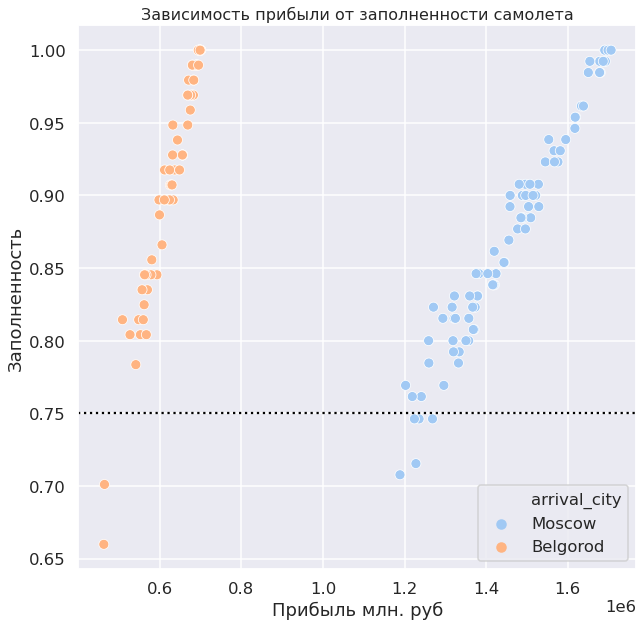

In [25]:
fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
sns.set_style('darkgrid')
sns.scatterplot(x='profit',y='occupancy_ratio', hue='arrival_city', data=data, s=100, palette='pastel')
plt.title(
    'Зависимость прибыли от заполненности самолета', fontsize=16)
plt.xlabel('Прибыль млн. руб')
plt.ylabel('Заполненность')
plt.axhline(0.75, linestyle=':', color='black')


Создадим границу неприбыльности для каждого направления.

In [26]:
moscow_unprofit = data[(data.occupancy_ratio <= 0.75) & (data.arrival_city == 'Moscow')].profit.max()

In [27]:
belgorod_unprofit = data[(data.occupancy_ratio <= 0.75) & (data.arrival_city == 'Belgorod')].profit.max()

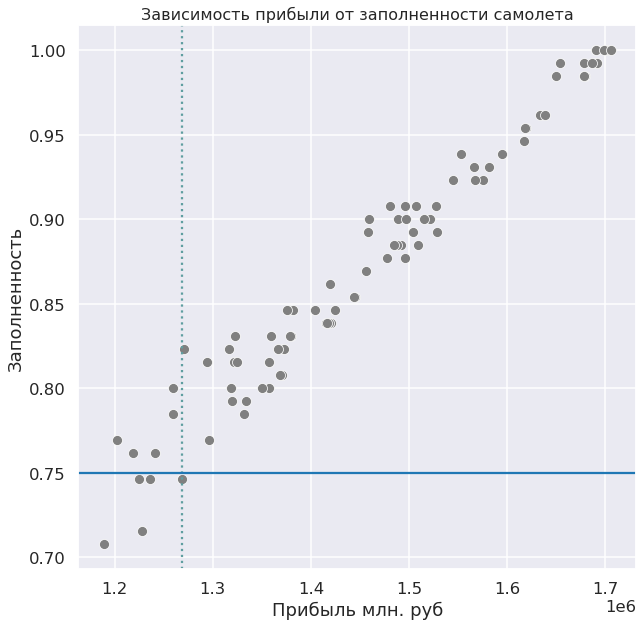

In [28]:
fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
sns.set_style('darkgrid')
sns.scatterplot(x='profit',y='occupancy_ratio', data=data[data.arrival_city=='Moscow'], s=100, color='grey')
plt.title(
    'Зависимость прибыли от заполненности самолета', fontsize=16)
plt.xlabel('Прибыль млн. руб')
plt.ylabel('Заполненность')
plt.axvline(moscow_unprofit, linestyle=':', color='cadetblue')
plt.axhline(0.75,linestyle='-')

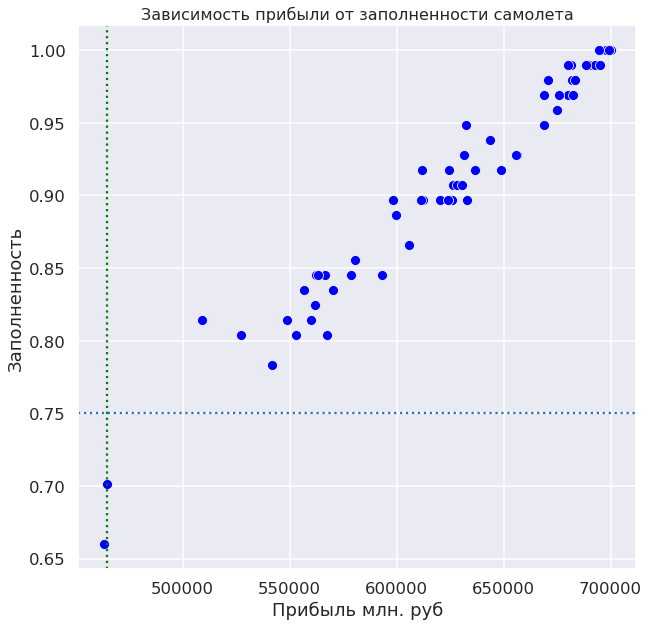

In [31]:
fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
sns.set_style('darkgrid')
sns.scatterplot(x='profit',y='occupancy_ratio', data=data[data.arrival_city=='Belgorod'], s=100, color='blue')
plt.title(
    'Зависимость прибыли от заполненности самолета', fontsize=16)
plt.xlabel('Прибыль млн. руб')
plt.ylabel('Заполненность')
plt.axvline(belgorod_unprofit, linestyle=':', color='green')
plt.axhline(0.75,linestyle=':')

Вот и список неприбыльных рейсов в результате моего анализа.

In [32]:
df1 = data[(data.occupancy_ratio <= 0.75) & (data.arrival_city == 'Moscow')&(data.profit<=moscow_unprofit)]

In [33]:
df2 = data[(data.occupancy_ratio <= 0.75) & (data.arrival_city == 'Belgorod')&(data.profit<=belgorod_unprofit)]

In [34]:
unprof_flight = set(list(df1.flight_id)+list(df2.flight_id))
unprof_flight

{136122, 136253, 136352, 136360, 136418, 136642, 136807}

In [41]:
data[data.flight_id.isin(unprof_flight)]

,flight_id,aircraft_model,departure_date,departure_city,departure_latitude,departure_longitude,arrival_city,arrival_latitude,arrival_longitude,tickets_sold,...,tickets_revenue,economy_revenue,business_revenue,occupancy_ratio,flight_duration,fuel_price,fuel_consumption,fuel_spent,fuel_cost,profit
2,136122,Boeing 737-300,2017-01-08,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,97.0,...,1431000.0,1065000.0,366000.0,0.746154,1.666667,41.4,2400,4000.000000,195408.00,1235592.0
30,136253,Boeing 737-300,2016-12-24,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,93.0,...,1407800.0,1005200.0,402600.0,0.715385,1.633333,38.9,2400,3920.000000,179935.84,1227864.0
56,136352,Boeing 737-300,2016-12-10,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,92.0,...,1372400.0,1006400.0,366000.0,0.707692,1.666667,38.9,2400,4000.000000,183608.00,1188792.0
57,136360,Boeing 737-300,2017-02-05,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,97.0,...,1455400.0,1052800.0,402600.0,0.746154,1.666667,39.6,2400,4000.000000,186912.00,1268488.0
69,136418,Boeing 737-300,2016-12-07,Anapa,45.002102,37.347301,Moscow,55.972599,37.414600,97.0,...,1407800.0,1078400.0,329400.0,0.746154,1.666667,38.9,2400,4000.000000,183608.00,1224192.0
115,136642,Sukhoi Superjet-100,2017-01-30,Anapa,45.002102,37.347301,Belgorod,50.643799,36.590099,64.0,...,531000.0,342000.0,189000.0,0.659794,0.816667,41.4,1700,1388.333333,67822.86,463177.0
157,136807,Sukhoi Superjet-100,2017-02-23,Anapa,45.002102,37.347301,Belgorod,50.643799,36.590099,68.0,...,531000.0,379800.0,151200.0,0.701031,0.833333,39.6,1700,1416.666667,66198.00,464802.0
